In [1]:
# Importing the Library
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
warnings.filterwarnings('ignore')
import scipy

In [2]:
#reading data and checking how it looks
data=pd.read_csv("./data/gapmiderData.csv")
#Our Interest of Columns are country, alcconsumption, co2emissions, lifeexpectancy
dataInterest=data[["country","alcconsumption","co2emissions","lifeexpectancy"]]
dataInterest["alcconsumption"]=pd.to_numeric(dataInterest["alcconsumption"],errors='coerce')
dataInterest["co2emissions"]=pd.to_numeric(dataInterest["co2emissions"],'coerce')
dataInterest["lifeexpectancy"]=pd.to_numeric(dataInterest["lifeexpectancy"],'coerce')
dataInterest.shape

(213, 4)

In [3]:
dataInterest=dataInterest.dropna()
print(dataInterest.shape)
# Next we will remove out the countries that have alcohol consumption less than 1 litres to make the analysis more significant
dataInterest=dataInterest[dataInterest["alcconsumption"]>1]

(172, 4)


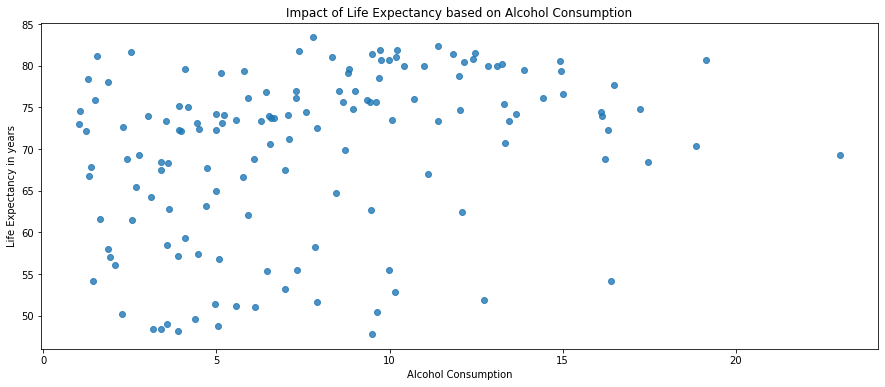

In [10]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataInterest["alcconsumption"],y=dataInterest["lifeexpectancy"],fit_reg=False)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy in years");
plt.title("Impact of Life Expectancy based on Alcohol Consumption");

 from the scatter plot there seems to be a weak linear relationship, let's confirm with the pearson's test

In [14]:
results=scipy.stats.pearsonr(dataInterest["alcconsumption"],dataInterest["lifeexpectancy"])
print("Pearson's r value ",results[0])
print("Pearson's test p value ",results[1])

Pearson's r value  0.30247420544143916
Pearson's test p value  0.0002175188349681372


### so from the pearson's test it is confirmed that there is a weak positive correlation between the alcohol consumption and life expectancy and is statistically significant as well ( p value is less than 0.05) 